<a href="https://colab.research.google.com/github/anand1994sp/AutoSAVE/blob/main/digits_recognition_neural_network_tensorboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

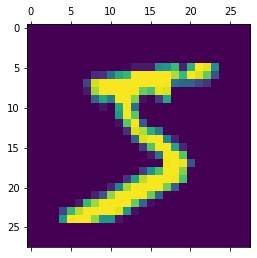

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [18]:
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="/content/logs", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2779 - accuracy: 0.9199
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1256 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0880 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0669 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0524 - accuracy: 0.9836


In [20]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1437), started 0:27:44 ago. (Use '!kill 1437' to kill it.)

<IPython.core.display.Javascript object>

In [21]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6007: logdir logs (started 0:01:11 ago; pid 8103)
  - port 6006: logdir logs/fit (started 0:28:17 ago; pid 1437)


In [22]:
notebook.display(port=6006, height=1000) 

Selecting TensorBoard with logdir logs/fit (started 0:28:31 ago; port 6006, pid 1437).


<IPython.core.display.Javascript object>

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [12]:
model.get_weights()

[array([[-0.0713077 , -0.05151842, -0.01082648, ..., -0.06929852,
          0.05938587, -0.0312606 ],
        [ 0.08068164,  0.05810401, -0.00406053, ...,  0.06347516,
          0.0797037 , -0.05932257],
        [ 0.01123825, -0.05302692,  0.03278165, ..., -0.01113471,
         -0.06546052,  0.04573692],
        ...,
        [-0.01299725,  0.07303885, -0.00951222, ...,  0.07777853,
          0.05318585, -0.04640034],
        [ 0.02929083, -0.04657516, -0.01226312, ..., -0.05577078,
         -0.00292384, -0.0693849 ],
        [-0.03730951,  0.00092187,  0.04841867, ..., -0.05773806,
          0.00114465,  0.02008157]], dtype=float32),
 array([ 1.86244884e-04,  8.32282454e-02,  2.16998756e-02, -1.05734840e-01,
        -1.69377550e-01,  8.15067161e-03,  4.00591195e-02, -3.20492536e-02,
         9.87465903e-02, -5.10423891e-02,  6.60201535e-02,  1.16152130e-01,
        -4.82496209e-02,  1.14455789e-01,  9.32631716e-02,  3.85768116e-02,
         1.61068127e-01, -5.59680127e-02,  8.78737941e